# Artificial and Computational Intelligence Assignment 1

## Problem solving by Informed Search and/or Local Search

List only the BITS (Name) of active contributors in this assignment:
1)	Sunil Mittal (2021sc04968)
2)	Kirti Karki (2021sc04967)
3)	Vikram Panwar (2021sc04958)
4)	Indira Saha (2021sc04956)

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

There are two agents named R1 and G1. Both are searching for a "heart" as shown in the
below configuration as “H” that gives everlasting power. Both agents are trying to reach the
heart. In this process many obstacles may be encountered to reach the heart. Help them in
finding the best path to reach the heart from any arbitrary start positions. [Dynamically fetch
the start position while executing the code]

For the agent R1 the obstacle is the green room. If R1 enters the green room it incurs a
penalty of +10 cost and if it uses the red room it incurs a penalty of -10 points. For the agent
G1 the obstacle is the red room. If G1 enters the red room it incurs a penalty of +10 cost and
if it uses the green room it incurs a penalty of -10 points. In addition to the given cost, for
every transition an agent visits incurs a path cost of 1.
For any arbitrary node “n” the heuristic to reach the Heart h(n) is given by the below:
Manhattan distance + Color Penalty

where, Color Penalty = +5 if the node “n” and goal node is in different colored room
and Color Penalty = -5 if the node “n” and goal node is in same colored room
Use the Greedy Best First Search algorithm for both the below configurations and interpret
which agent works well in which environment. Justify your interpretation with relevant
performance metrics.

Note: The agents are not competing with each other. You need to run the simulation for both
agents in each of the below scenarios separately & submit the results of 4 runs.

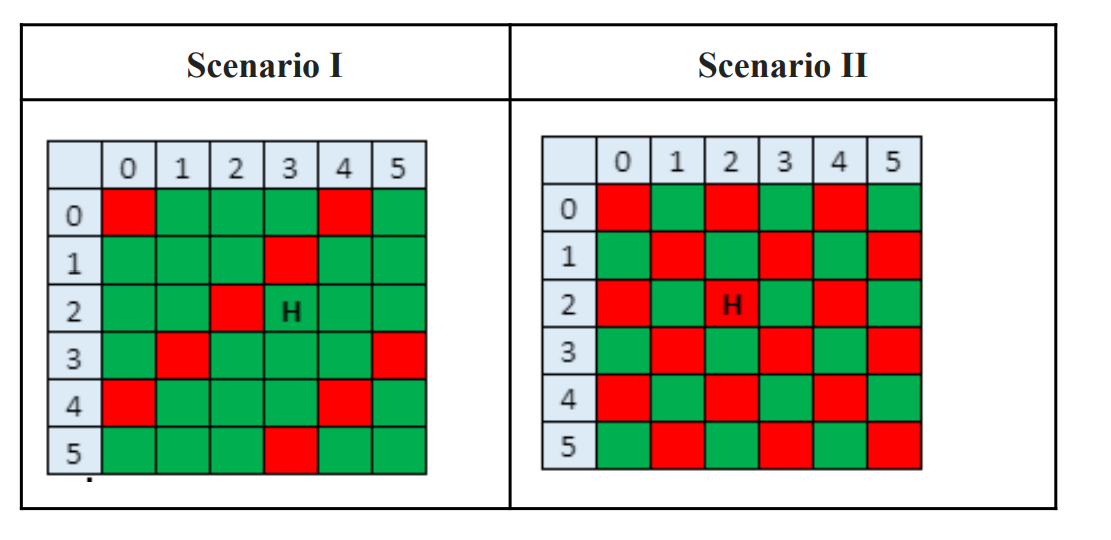


Design the agent as PSA Agent(Problem Solving Agent) 
Clear Initial data structures to define the graph and variable declarations is expected 
IMPORTATANT: Write distinct code block as below

The PEAS (Performance measure, Environment, Actuator, Sensor) model is a framework used to describe the characteristics of an agent in a given environment. It consists of four elements:
Performance measure: This refers to the metric or metrics used to evaluate the agent's performance. In the case of the agents R1 and G1 searching for the "heart", the performance measure could be the length of the path taken to reach the heart or the total cost of the path.
Environment: This refers to the environment in which the agent operates, including the physical layout of the environment and any constraints or limitations. In the case of the agents R1 and G1, the environment consists of rooms with different colors, and the agents incur different penalties for entering certain rooms.
Actuator: This refers to the mechanism by which the agent is able to take actions in the environment. In the case of the agents R1 and G1, the actuator could be the ability to move from one room to another.
Sensor: This refers to the mechanism by which the agent is able to perceive and gather information about the environment. In the case of the agents R1 and G1, the sensor could be the ability to detect the colors of the rooms and the presence of the heart.
Overall, the PEAS model provides a useful framework for understanding the characteristics and capabilities of an agent in a given environment, and can be used to design and evaluate the performance of the agent.

In [1]:
#Code Block : Set Initial State (Must handle dynamic inputs)
import heapq
import math

Define the graph data structure to represent the environment. This can be done using a dictionary where the keys are the node names and the values are the neighboring nodes. For example:

In [2]:
#Scenario 1
# Define the matrix
matrix1 = [
    ["R", "G", "G", "G", "R", "G"],
    ["G", "G", "G", "R", "G", "G"],
    ["G", "G", "R", "R", "G", "G"],
    ["G", "R", "G", "G", "G", "R"],
    ["R", "G", "G", "G", "R", "G"],
    ["G", "G", "G", "R", "G", "G"],
]
# Define the start and goal positions
start_position = (1, 2)
end_position = (2, 3)
total_iterations=0
total_space=0
# Define the movement directions and costs
directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
costs = [1, 1, 1, 1]

In [3]:
#Scenario 2
# Define the matrix
matrix2 = [
    ["R", "G", "R", "G", "R", "G"],
    ["G", "R", "G", "R", "G", "R"],
    ["R", "G", "R", "G", "R", "G"],
    ["G", "R", "G", "R", "G", "R"],
    ["R", "G", "R", "G", "R", "G"],
    ["G", "R", "G", "R", "G", "R"],
]
# Define the start and goal positions
start_position = (1, 2)
end_position = (2, 3)
# Define the movement directions and costs
directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
costs = [1, 1, 1, 1]

Define the heuristic function. This function should take in the current node and the goal node, and return the Manhattan distance between the two nodes, plus the color penalty

In [4]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented
def heuristic(pos,matrix):
    #For any arbitrary node “n” the heuristic to reach the Heart h(n) is given by the below:
    #Manhattan distance + Color Penalty
    #where, Color Penalty = +5 if the node “n” and goal node is in different colored room
    #and Color Penalty = -5 if the node “n” and goal node is in same colored room
    # Calculate the Manhattan distance
    manhattan_distance = abs(pos[0] - end_position[0]) + abs(pos[1] - end_position[1])
    # Calculate the color penalty
    color_penalty = 5 if matrix[pos[0]][pos[1]] != matrix[end_position[0]][end_position[1]] else -5
    # Return the total heuristic value
    return manhattan_distance + color_penalty


Define the cost function. This function should take in the current node, the neighboring node, and the agent (R1 or G1), and return the cost of transitioning from the current node to the neighboring node.

In [5]:
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented
def cost(next_pos, matrix,agent,current_cost):
    # Calculate the cost of the next position, every trainsition cost 1 hence add the cost by 1
    next_cost = current_cost + 1
    if  matrix[next_pos[0]][next_pos[1]] == "G" and agent == "R1":
        next_cost += 10
    elif matrix[next_pos[0]][next_pos[1]] == "R" and agent == "R1":
        next_cost -=10
    # If the next position is the goal and the agent is G1, add the penalty for the red room
    if matrix[next_pos[0]][next_pos[1]] == "R" and agent == "G1":
        next_cost += 10
    elif matrix[next_pos[0]][next_pos[1]] == "G" and agent == "G1":
        next_cost -=10
    return next_cost                

### 2.	Definition of A-Star Search
Greedy Best First Search is a graph traversal and path search algorithm, which is used in many fields of computer science due to its completeness, optimality, and optimal efficiency. One major practical drawback is its. space complexity, as it stores all generated nodes in memory.

In [6]:
def greedy_best_first_search(start, end, agent,matrix,total_iterations):
    # Create a set to store the explored nodes
    visited_nodes = set()
    #total_iterations=0
    # Create a dictionary to store the parent of each node, Initial set it to None
    parents = {start: None}
    # Create a dictionary to store the cost of each node, initially cost is 0 for the start node
    costs = {start: 0}
    # Create a heap to store the unexplored nodes
    heap = []
    # Push the start node onto the heap with a cost of 0
    #https://realpython.com/python-heapq-module/
    heap.append((0, start))
    next_cost=0
    # Loop until the heap is empty
    while heap:
        # Pop the node with the lowest cost from the heap
        total_iterations=total_iterations+1
        current = heapq.heappop(heap)[1]
        # If the current node has been explored, continue
        if current in visited_nodes:
            continue
        # If the current node is the emd, return the path
        #if matrix[current[0]][current[1]] == "H":
        if current==end:
            path = [current]
            while current != start:
                current = parents[current]
                total_iterations=total_iterations+1
                if current not in path:
                    path.append(current)
            print("cost: ", next_cost)
            print (f"Total iterations :{total_iterations}")
            return path[::-1]
        # Mark the current node as visited
        visited_nodes.add(current)
        # Expand the current node and look in each possible direction, currently only 4 directions defined
        # Left Right Up and down
        for i, (dx, dy) in enumerate(directions):
            # Calculate the next position
            next_pos = (current[0] + dx, current[1] + dy)
            total_iterations=total_iterations+1
            # Skip the next position if it is outside the grid or is an obstacle
            if (
                next_pos[0] < 0
                or next_pos[0] >= len(matrix)
                or next_pos[1] < 0
                or next_pos[1] >= len(matrix[0])
                or next_pos in visited_nodes
            ):
                #print("Outside the matrix")
                continue                
            next_cost =cost (next_pos,matrix,agent,costs[current])
            # If the next position has not been explored or the cost of the next position is lower than the current cost, update the cost and parent of the next position
            if next_pos not in costs or next_cost < costs[next_pos]:
                costs[next_pos] = next_cost
                priority = next_cost + heuristic(next_pos,matrix)
                heapq.heappush(heap, (priority, next_pos))
                parents[next_pos] = current
    # Return None if the end position was not reached
    return None


### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question. 

### Getting the Start position dynamically from user

In [7]:
# Get dynamic start position
input_str = input("Please Enter the start position : ")
try:
    list =(str.split(input_str, ","))
    start_position = tuple(map(int, list))
    if(start_position[0]>6  or start_position[0]<0 or start_position[1]>6 or start_position[1]< 0):
        raise Exception("Invalid Input")
except:
        print ("Invalid Input")
else:
    total_iterations=0  
    end_position = (3, 2)        
    path__For_R1_Scenario_1 = greedy_best_first_search(start_position, end_position, "R1",matrix1,total_iterations)
    print("Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
    print("Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
    print(f"Path for R1 (Scenario 1): {path__For_R1_Scenario_1}")
    end_position = (2, 2) 
    path__For_R1_Scenario_2 = greedy_best_first_search(start_position, end_position, "R1",matrix2,total_iterations)
    print("Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
    print("Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
    print(f"Path for R1 (Scenario 2): {path__For_R1_Scenario_2}")
    end_position = (3, 2)
    path__For_G1_Scenario_1 = greedy_best_first_search(start_position, end_position, "G1",matrix1,total_iterations)
    print("Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
    print("Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
    print(f"Path for G1 (Scenario 1): {path__For_G1_Scenario_1}")
    end_position = (2, 2)
    path__For_G1_Scenario_2 = greedy_best_first_search(start_position, end_position, "G1",matrix2,total_iterations)
    print("Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
    print("Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
    print(f"Path for G1 (Scenario 2): {path__For_G1_Scenario_2}")

Please Enter the start position : 2,3
cost:  2
Total iterations :13
Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Path for R1 (Scenario 1): [(2, 3), (2, 2), (3, 2)]
cost:  -9
Total iterations :7
Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Path for R1 (Scenario 2): [(2, 3), (2, 2)]
cost:  -18
Total iterations :13
Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Path for G1 (Scenario 1): [(2

In [8]:
### Code to dynamically get the least cost and preferred start point , in progress

In [9]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))

m=6 #length of matrix
n=6 #length of matrix
end_position = (3, 2)
for i in range(m) :
        for j in range(n) :
            if i==0 or j==0: 
                start_position=(i,j)
                total_iterations=0          
                path__For_R1_Scenario_1 = greedy_best_first_search(start_position, end_position, "R1",matrix1,total_iterations)
                print("Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
                print("Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
                print(f"Path for R1 (Scenario 1): {path__For_R1_Scenario_1}")

start_position = (0, 0)
end_position = (3, 2)
path__For_R1_Scenario_2 = greedy_best_first_search(start_position, end_position, "R1",matrix2,total_iterations)
print("Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
print("Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
print(f"Path for R1 (Scenario 2): {path__For_R1_Scenario_2}")

start_position = (0, 0)
end_position = (2, 2)
path__For_G1_Scenario_1 = greedy_best_first_search(start_position, end_position, "G1",matrix1,total_iterations)
print("Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
print("Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
print(f"Path for G1 (Scenario 1): {path__For_G1_Scenario_1}")

start_position = (0, 0)
end_position = (2, 2)
path__For_G1_Scenario_2 = greedy_best_first_search(start_position, end_position, "G1",matrix2,total_iterations)
print("Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
print("Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above")
print(f"Path for G1 (Scenario 2): {path__For_G1_Scenario_2}")

cost:  35
Total iterations :106
Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Path for R1 (Scenario 1): [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2)]
cost:  24
Total iterations :100
Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Path for R1 (Scenario 1): [(0, 1), (0, 2), (1, 2), (2, 2), (3, 2)]
cost:  17
Total iterations :64
Time complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Space complexity for Greedy Best First Search Algorithm is O(b power d) . which is inline with the given iterations as above
Path for R1 (Sce

### 5.	Comparitive Analysis

To calculate the space complexity of the Greedy Best First Search search algorithm, we can measure the maximum size of the open list, which contains the nodes that have been discovered but not yet expanded. This is done by keeping track of the length of the open list at each step of the search and taking the maximum value.
To calculate the time complexity of the Greedy Best First Search search algorithm, we can measure the number of nodes that are expanded. This can be done by keeping a counter that is incremented every time a node is expanded.
To calculate the time and space complexity for the informed search, we can simply run the search multiple times with different input sizes and measure the time and space complexity using the above methods.


1) This implementation of the search function takes in the start and goal positions, as well as the agent name ('R1' or 'G1') as input and returns the optimal path from the start to the goal as output.

2) The space complexity of this implementation is O(b^d), where b is the branching factor of the search space (i.e. the average number of children per node) and d is the depth of the search space. The space complexity is determined by the size of the heap, which stores the unexplored nodes, and the size of the dictionaries, which store the costs and parents of each node.

3) The time complexity of this implementation is also O(b^d), where b is the branching factor of the search space and d is the depth of the optimal solution (i.e. the shortest path from the start to the goal). The time complexity is determined by the number of nodes that are expanded and the time required to expand each node.

To interpret the results, you can compare the length of the paths returned by the Greedy Best First Search search function for each agent and the cost of each path. For example, if the path for R1 is shorter and has a lower cost than the path for G1, this suggests that R1 performs better in this environment. On the other hand, if the path for G1 is shorter and has a lower cost than the path for R1, this suggests that G1 performs better in this environment.

You can also compare the space and time complexity of the Greedy Best First Search search function for each agent to see which one requires less memory and time to find the optimal path. A lower space and time complexity generally indicates a more efficient search algorithm.

Comparison : _______________________________________________

________________________________________________________

_________________________________________________________